# ECOMMERCE ANALYSIS

In [24]:
#importing necessary packages
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the json file
df=pd.read_json("fashion_products_dataset.json")

In [3]:

df.head()

,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:51,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
1,893e6980-f2a0-531f-b056-34dd63fe912c,"1,499",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,66% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
3,3f3f97bb-5faf-57df-a9ff-1af24e2b1045,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9ESZZ7YWEF,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,911,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
4,750caa3d-6264-53ca-8ce1-94118a1d8951,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EVXKBSUD7,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943,Bottomwear,"Solid Men Brown, Grey Track Pants",https://www.flipkart.com/yorker-solid-men-brow...


In [4]:
#dropping unnecessary columns
df=df.drop(columns=['_id','pid','images','url','description','product_details'])

In [5]:
#replacing blank values with np nan
df = df.replace('', np.nan)

In [6]:
df.isna().sum()

actual_price       863
average_rating    2446
brand             2068
category             0
crawled_at           0
discount           941
out_of_stock         0
seller            1741
selling_price        2
sub_category         0
title                0
dtype: int64

In [7]:
df=df.dropna()
df=df.reset_index()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24474 entries, 0 to 24473
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           24474 non-null  int64         
 1   actual_price    24474 non-null  object        
 2   average_rating  24474 non-null  object        
 3   brand           24474 non-null  object        
 4   category        24474 non-null  object        
 5   crawled_at      24474 non-null  datetime64[ns]
 6   discount        24474 non-null  object        
 7   out_of_stock    24474 non-null  bool          
 8   seller          24474 non-null  object        
 9   selling_price   24474 non-null  object        
 10  sub_category    24474 non-null  object        
 11  title           24474 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(9)
memory usage: 2.1+ MB


In [10]:
#cleaning columns induvidually and casting types
df['actual_price']=df['actual_price'].str.replace(',','').astype(int)
df['average_rating']=df['average_rating'].astype(float)
df['selling_price']=df['selling_price'].str.replace(',','').astype(int)
df['discount']=df['discount'].str.replace('% off','').astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24474 entries, 0 to 24473
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           24474 non-null  int64         
 1   actual_price    24474 non-null  int32         
 2   average_rating  24474 non-null  float64       
 3   brand           24474 non-null  object        
 4   category        24474 non-null  object        
 5   crawled_at      24474 non-null  datetime64[ns]
 6   discount        24474 non-null  int32         
 7   out_of_stock    24474 non-null  bool          
 8   seller          24474 non-null  object        
 9   selling_price   24474 non-null  int32         
 10  sub_category    24474 non-null  object        
 11  title           24474 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(1), int32(3), int64(1), object(5)
memory usage: 1.8+ MB


In [23]:
df.to_csv('fashion.csv',index=False)

## Identifying popular product categories and brands.

The category column in the df has only two categories limiting the insight provided. whereas the subcategories provide much more category names and helps in identifying the trends 

In [12]:
top_brands=df['brand'].value_counts().nlargest(10)
top_categories=df['sub_category'].value_counts().nlargest(10)

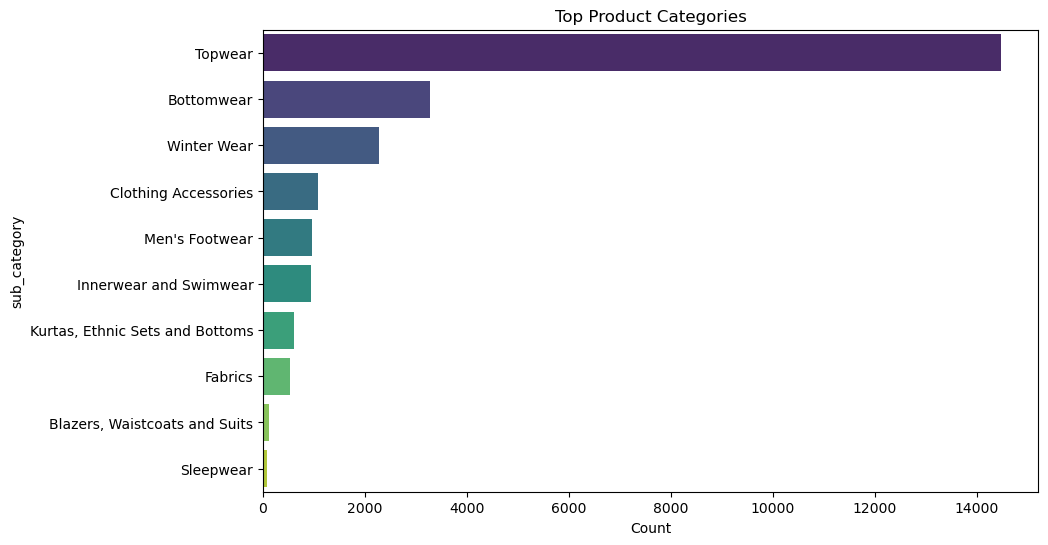

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top Product Categories')
plt.xlabel('Count')
plt.show()

Top brands can be caluclated by using the count of the brands. which provide a measure of the popularity of the brand in the dataset

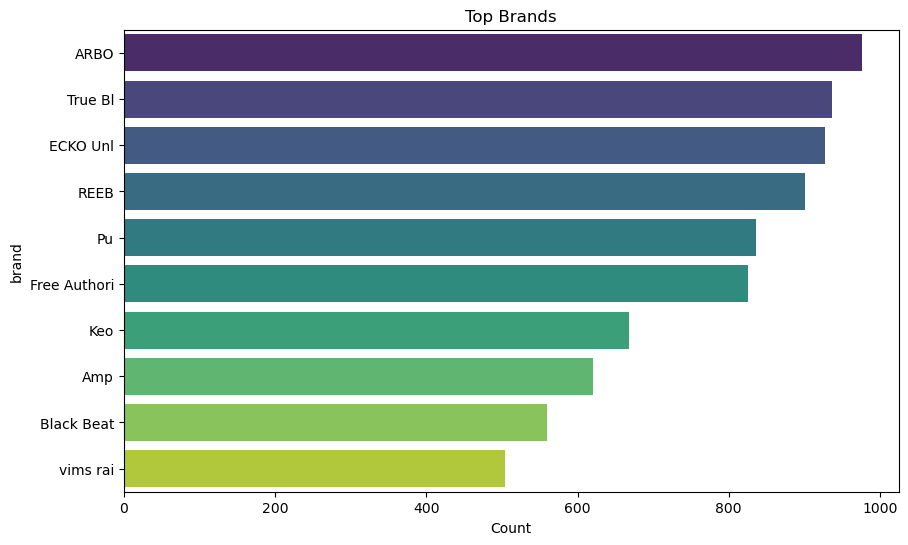

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')
plt.title('Top Brands')
plt.xlabel('Count')
plt.show()


## Analyzing pricing trends and discount strategies.

The rise and fall of the price of the products can be analysed using the ptice and time columns which provide insight into the demand of the product based on the time of purchase

In [15]:
average_price_over_time = df.groupby('crawled_at')['selling_price'].mean()


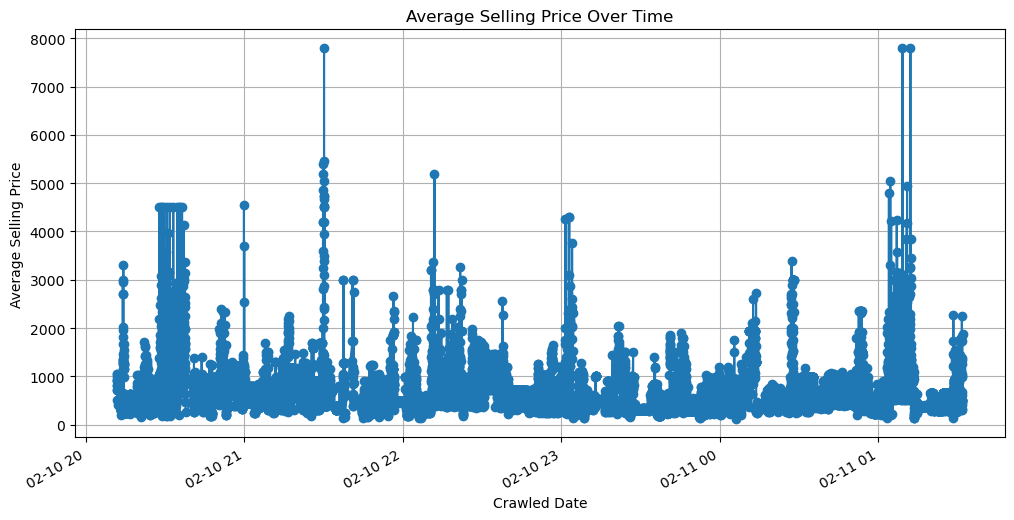

In [16]:
plt.figure(figsize=(12, 6))
average_price_over_time.plot(marker='o')
plt.title('Average Selling Price Over Time')
plt.xlabel('Crawled Date')
plt.ylabel('Average Selling Price')
plt.grid(True)
plt.show()

The frequency of the purchase and the price of the product can be found using a histplot. which show us that product that are lower in price tend to sell more.

c:\Users\devli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


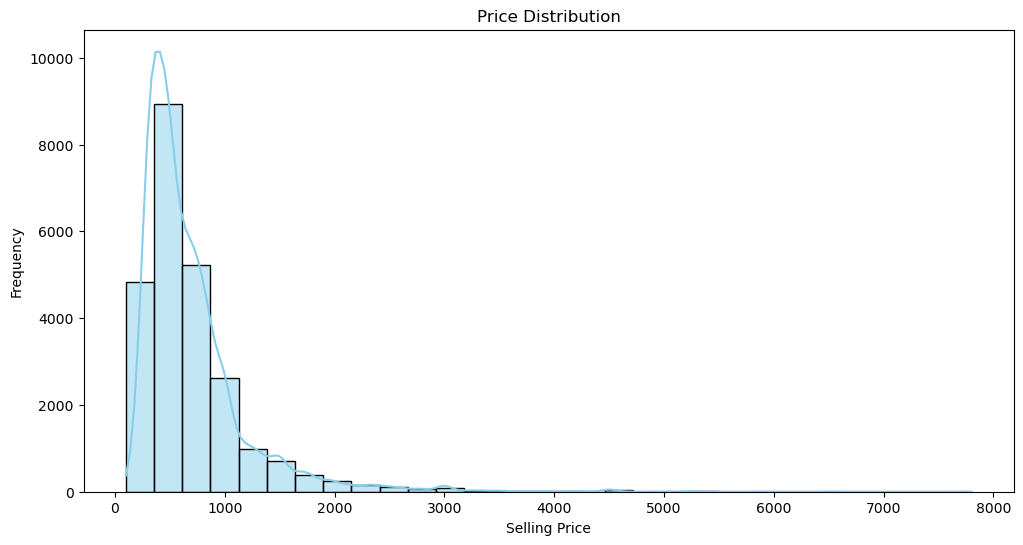

In [17]:
plt.figure(figsize=(12, 6))
sns.histplot(df['selling_price'], bins=30, kde=True, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

The next visualizatio shows us the average discount rate time. this helps us understand how the discount price and the fluctuation of sales vary over time 

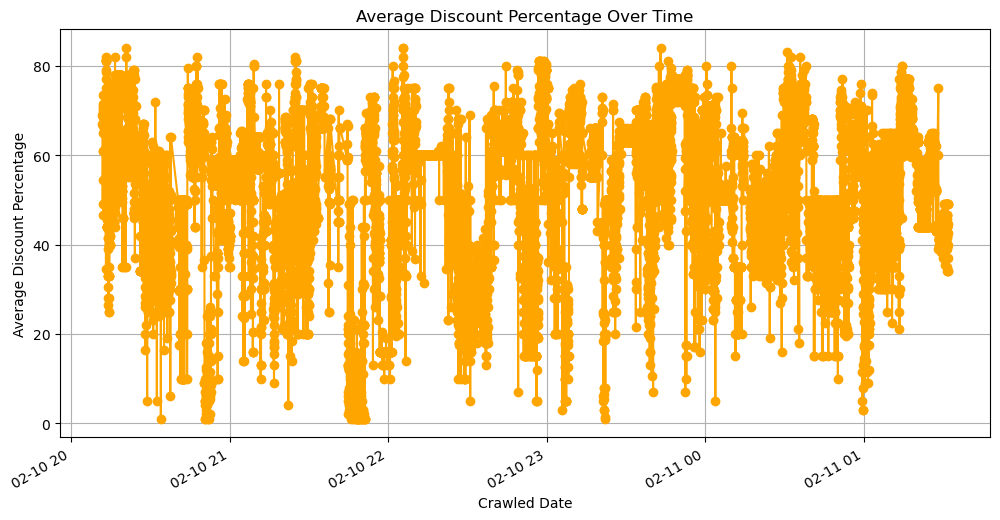

In [18]:
average_discount_over_time = df.groupby('crawled_at')['discount'].mean()
plt.figure(figsize=(12, 6))
average_discount_over_time.plot(marker='o', color='orange')
plt.title('Average Discount Percentage Over Time')
plt.xlabel('Crawled Date')
plt.ylabel('Average Discount Percentage')
plt.grid(True)
plt.show()

This graph reveals the correlation between discount rates and selling price. The graph reveals that products with lower price tend to have higher discounts whereas products that are expensive tend to have lower discounts. This may be due to the brand value of the product

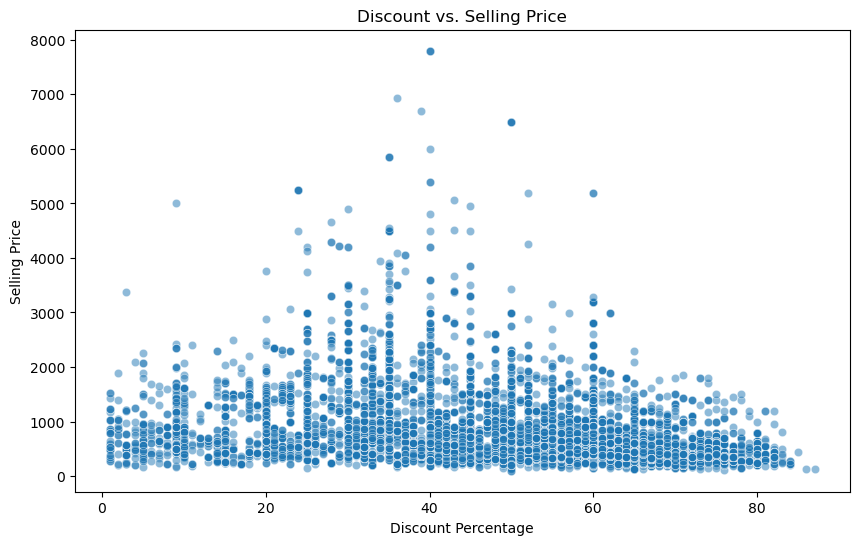

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discount', y='selling_price', data=df, alpha=0.5)
plt.title('Discount vs. Selling Price')
plt.xlabel('Discount Percentage')
plt.ylabel('Selling Price')
plt.show()

## Exploring correlations between various attributes such as price,rating, and brand.


The below visualization shows the corellation between 'actual_price', 'average_rating', 'selling_price' helping us understand how they are related.


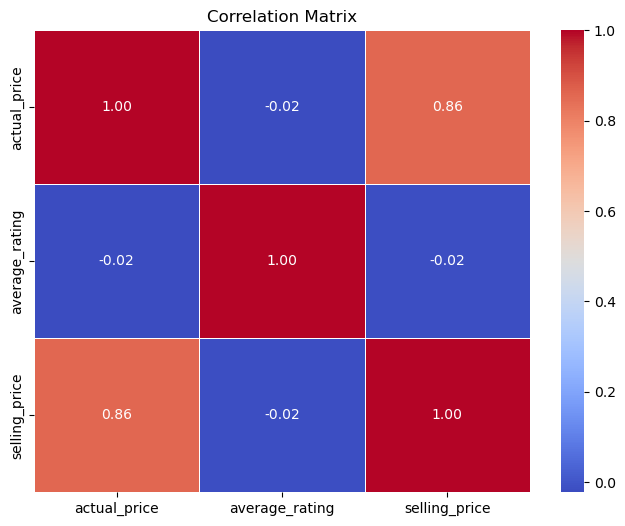

In [20]:
selected_columns = ['actual_price', 'average_rating', 'selling_price']

correlation_matrix = df[selected_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The below graph provides the correlation between the rating and selling price of topo 20 brands. from the distribution it can be understood that brands that sell products at more cheaper prices tend to have higher rating

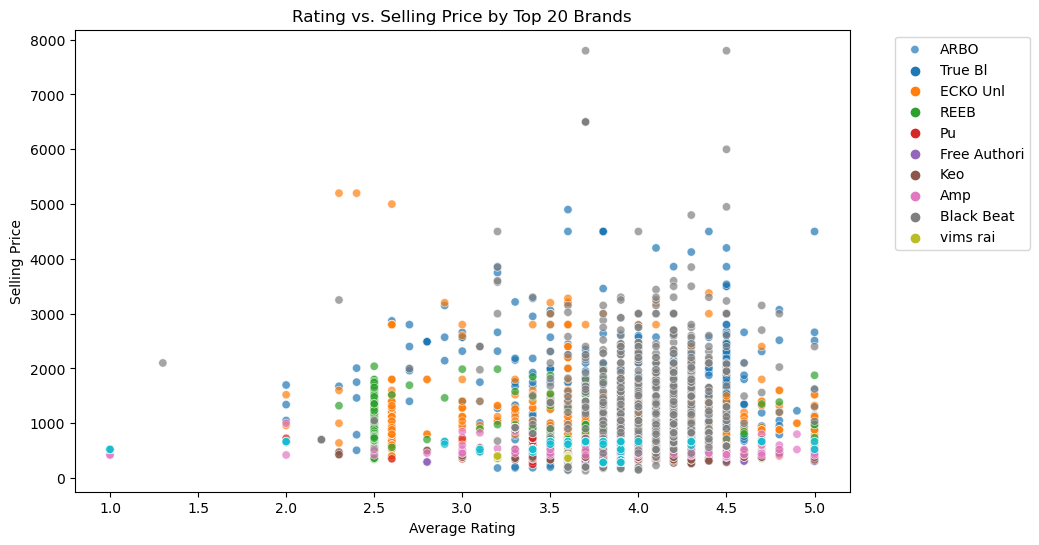

In [26]:

top_brands_list = top_brands.index[:20]
df_top20 = df[df['brand'].isin(top_brands_list)]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_rating', y='selling_price', data=df_top20, hue='brand', alpha=0.7)
plt.title('Rating vs. Selling Price by Top 20 Brands')
plt.xlabel('Average Rating')
plt.ylabel('Selling Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', labels=top_brands_list)
plt.show()
